In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-2


In [2]:
from src.classifiers import pipeline, validate
from src.visualizations import visualize_training_summary_boxplots, tabulate_hyperparameter_spaces, visualize_bootstrap_results
import pandas as pd

In [3]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(BASE_DIR, "data")
MODELS_DIR = os.path.join(BASE_DIR, "models")
RESULTS_DIR = os.path.join(BASE_DIR, "results")
CLASSIFIERS = [
    "LogisticRegression",
    "GaussianNB",
    "LinearDiscriminantAnalysis",
    "SVC",
    "RandomForestClassifier",
    "LGBMClassifier"
]
DF = pd.read_csv(os.path.join(DATA_DIR, "breast_cancer.csv"))
TARGET = "diagnosis"
N_ROUNDS = 10
N_OUTER_FOLDS = 5
N_INNER_FOLDS = 3
N_FEATURES_TO_SELECT = 10
N_OPTUNA_TRIALS = 100           # Number of trials for Optuna
VALIDATION_SET_FRACTION = 0.1
SEED = 42

In [4]:
# NOTE:
# The pipeline function took around 65 minutes to run on my machine with
# 10 rounds, 5 outer folds, 3 inner folds, 100 optuna trials, and 6 classifiers
# using 16 GB of RAM. USE LESS OPTUNA TRIALS IF YOU WANT TO RUN IT FASTER.

val_set = pipeline(
        classifiers=CLASSIFIERS,
        df=DF,
        target=TARGET,
        models_dir=MODELS_DIR,
        results_dir=RESULTS_DIR,
        n_rounds=N_ROUNDS,
        n_outer_folds=N_OUTER_FOLDS,
        n_inner_folds=N_INNER_FOLDS,
        n_features_to_select=N_FEATURES_TO_SELECT,
        n_optuna_trials=N_OPTUNA_TRIALS,
        validation_set_fraction=VALIDATION_SET_FRACTION,
        seed=SEED
)


--- LogisticRegression ---

Running Nested Cross Validation for LogisticRegression...
Random state base: 42
Number of rounds: 10
Number of outer folds: 5
Number of inner folds: 3
Number of features to select: 10
Number of Optuna trials: 100

Round 1/10...

Outer fold 1/5...
Inner fold 3/3...
Best trial score: 0.9653900709219858
Best hyperparameters: {'C': 2.670481498879006, 'l1_ratio': 0.03647232218525717, 'max_iter': 7883, 'class_weight': None}
Outer fold 1/5 results:
Accuracy: 0.9140
Precision: 0.8889
Recall: 0.8889
Specificity: 0.9298
MCC: 0.8187
F1: 0.8889
ROC AUC: 0.9094

Outer fold 2/5...
Inner fold 3/3...
Best trial score: 0.9490789363156102
Best hyperparameters: {'C': 4.025785157910583, 'l1_ratio': 0.38227796730724867, 'max_iter': 3990, 'class_weight': None}
Outer fold 2/5 results:
Accuracy: 0.9457
Precision: 0.9412
Recall: 0.9143
Specificity: 0.9649
MCC: 0.8843
F1: 0.9275
ROC AUC: 0.9396

Outer fold 3/5...
Inner fold 3/3...
Best trial score: 0.94900971817604
Best hyperparamet

In [5]:
# NOTE: Here I am saving the holdout set for a final evaluation later

val_set.to_csv(os.path.join(DATA_DIR, "validation_set.csv"), index=False)

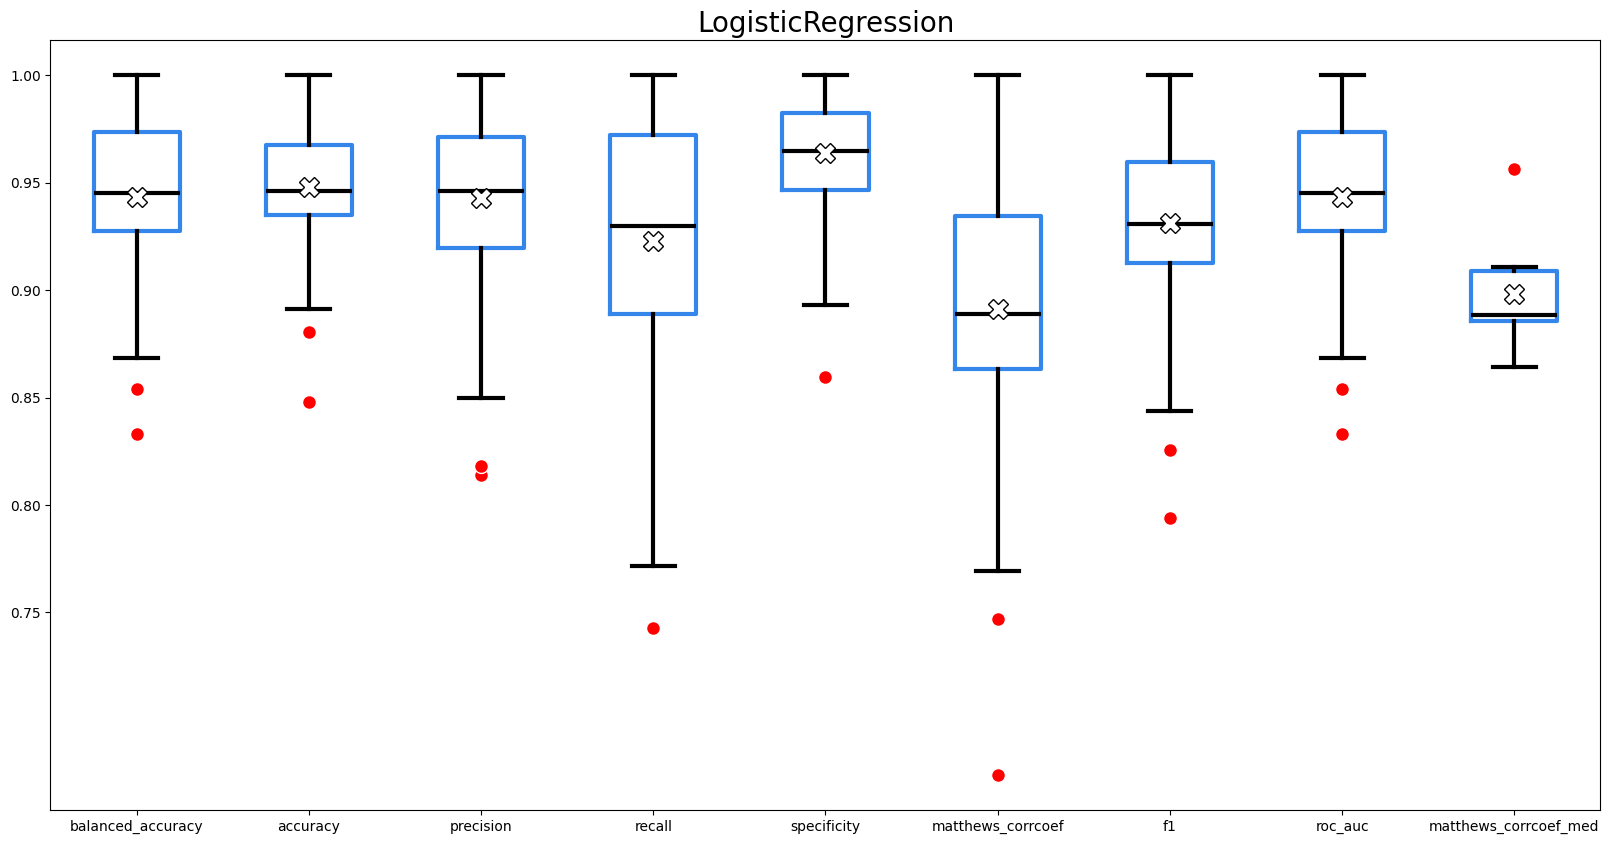

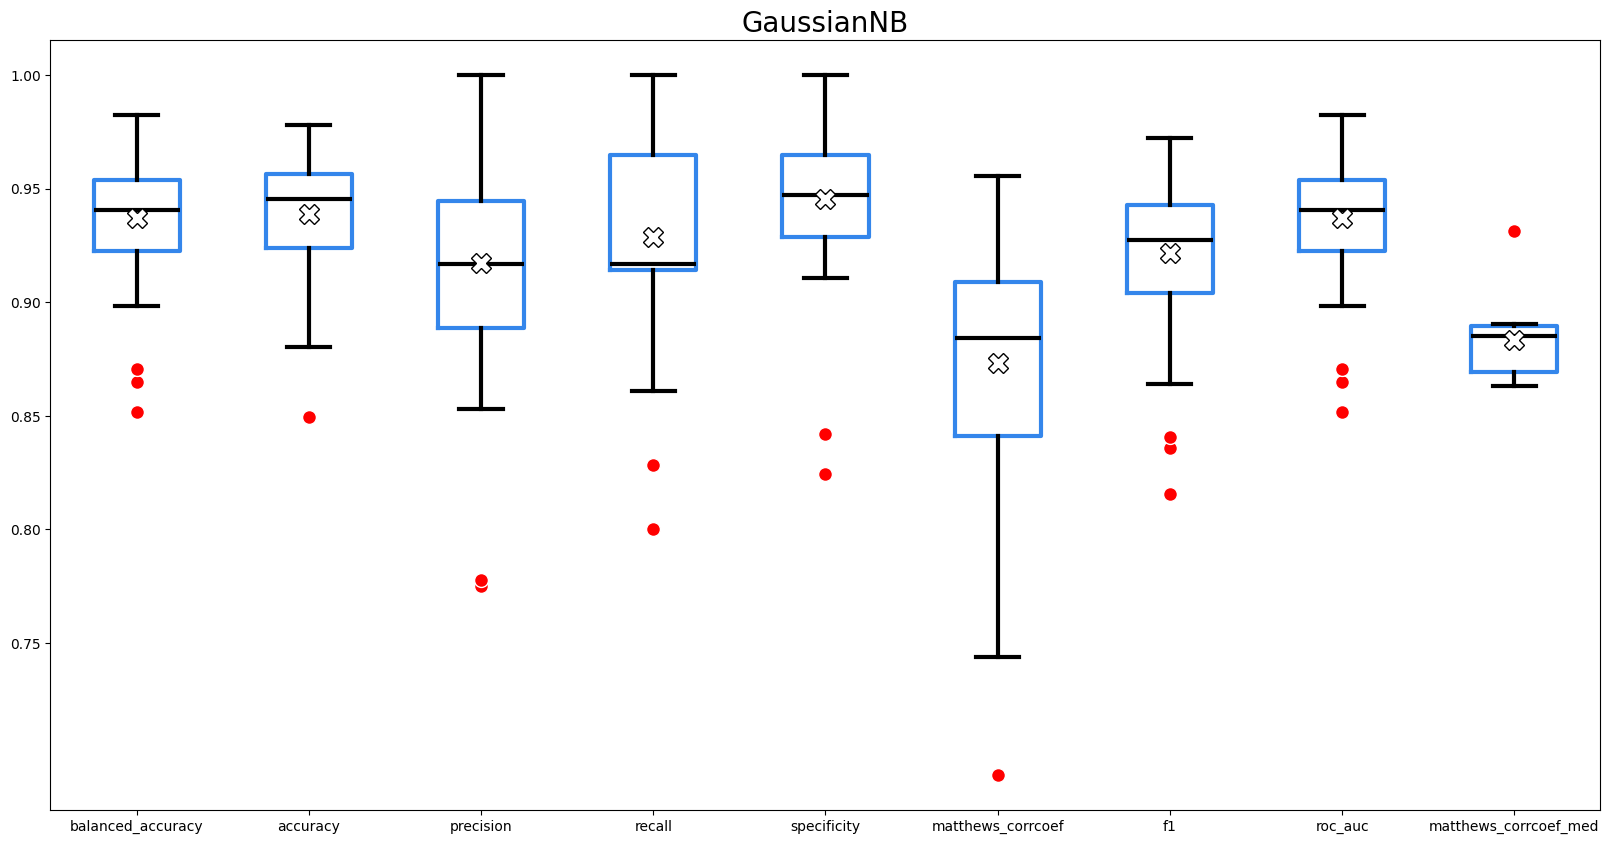

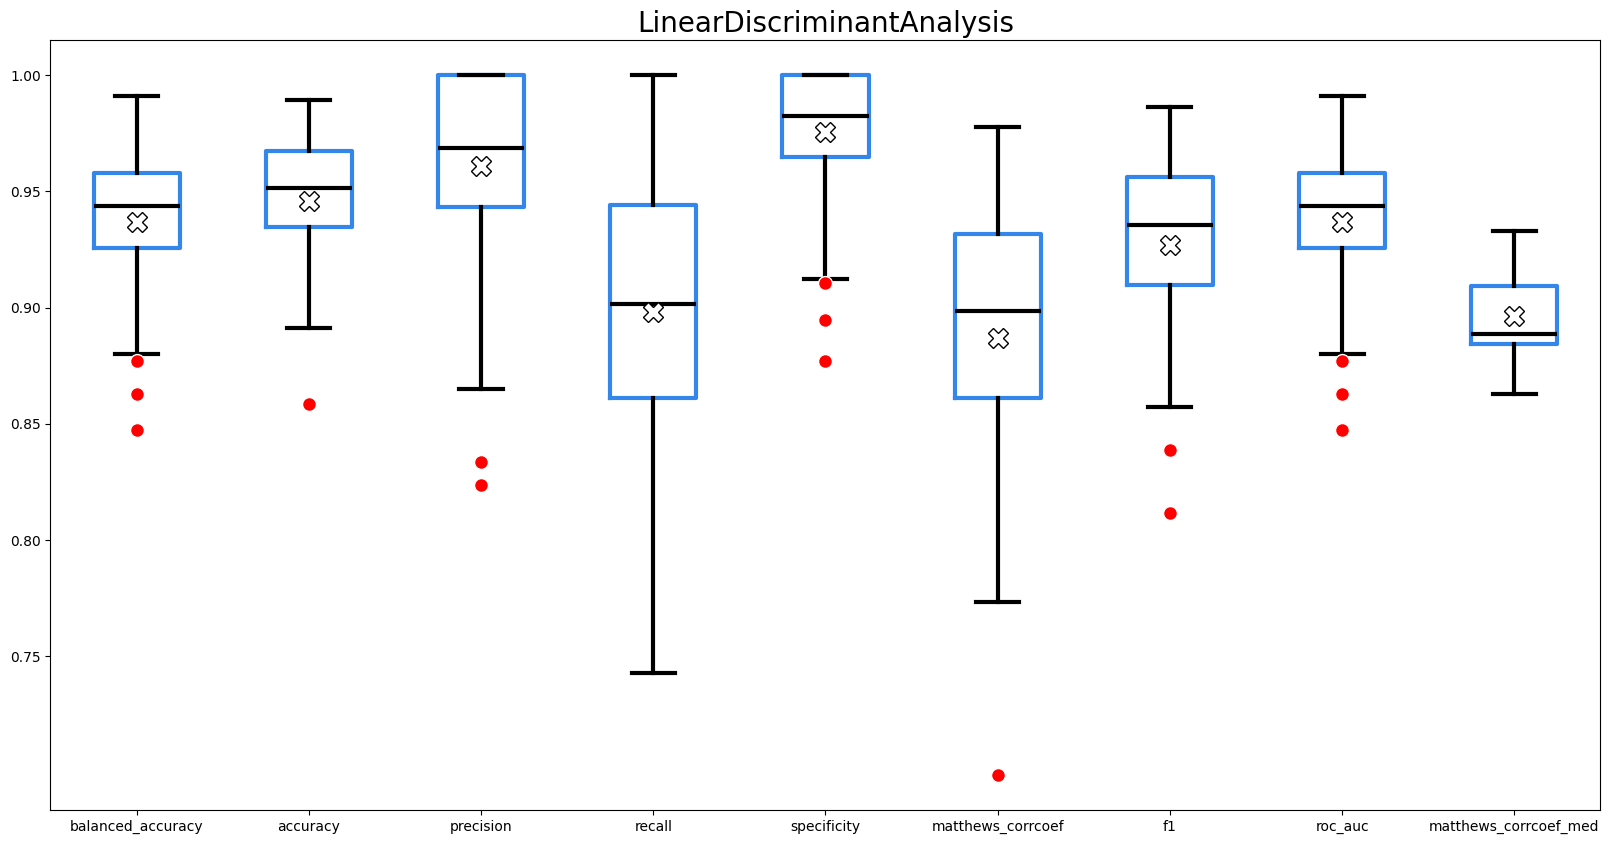

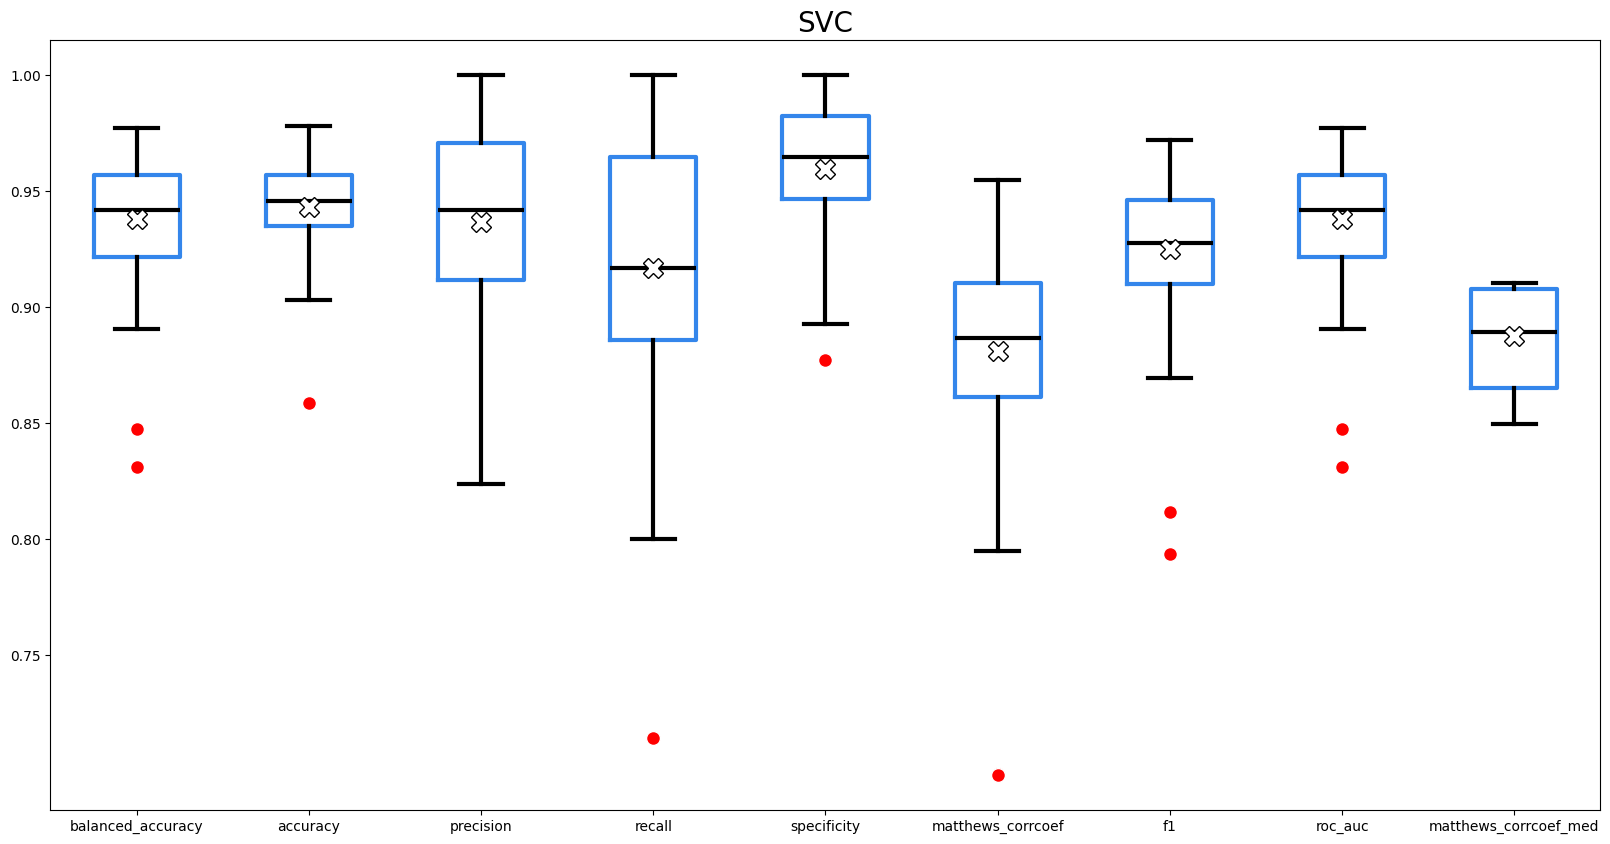

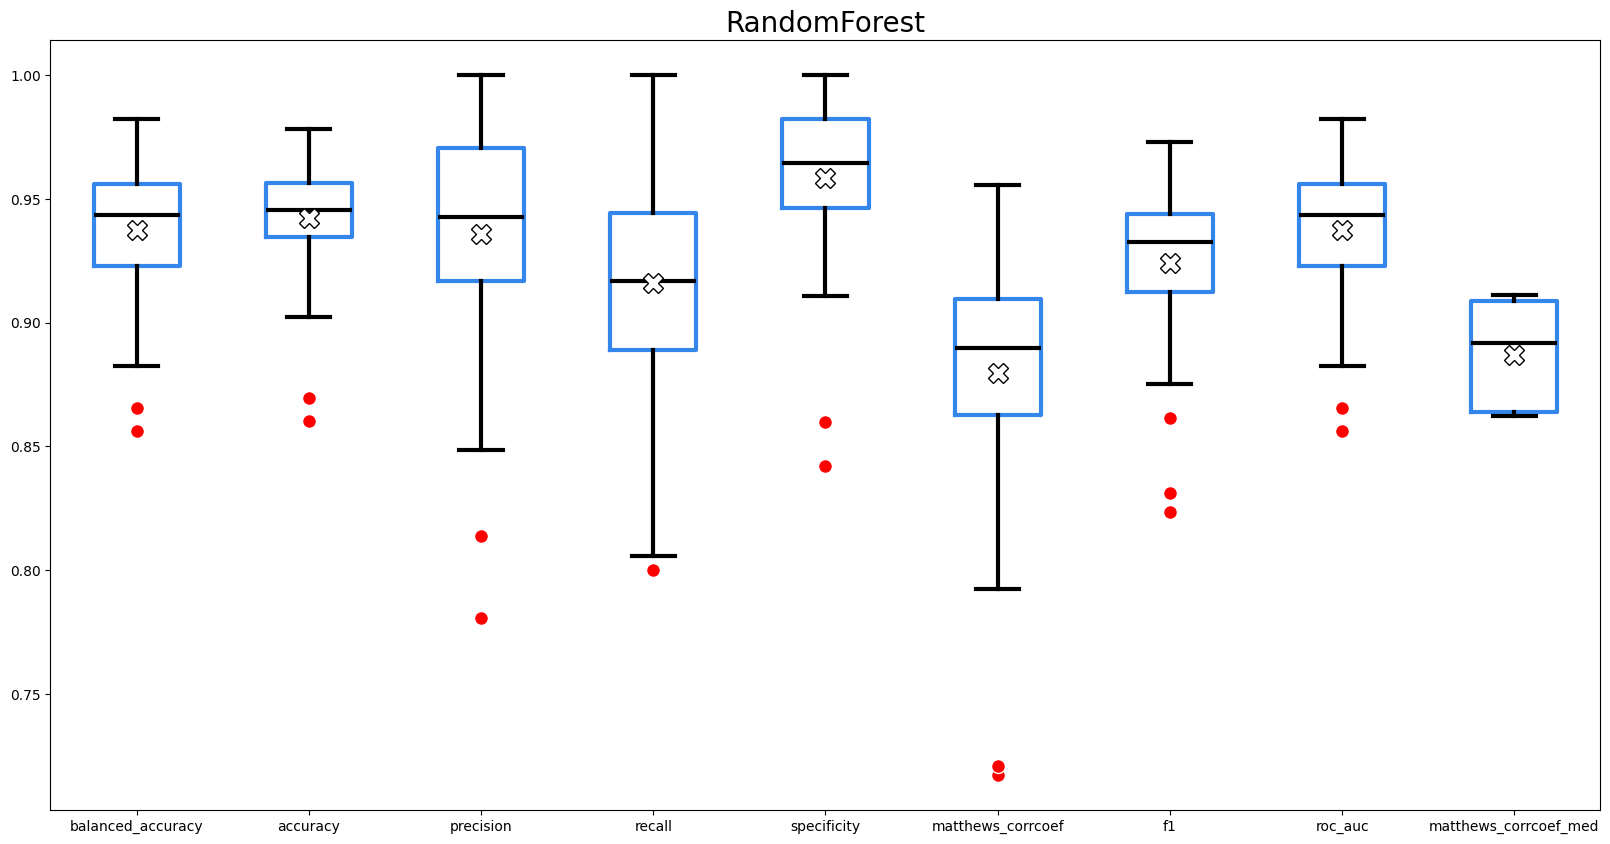

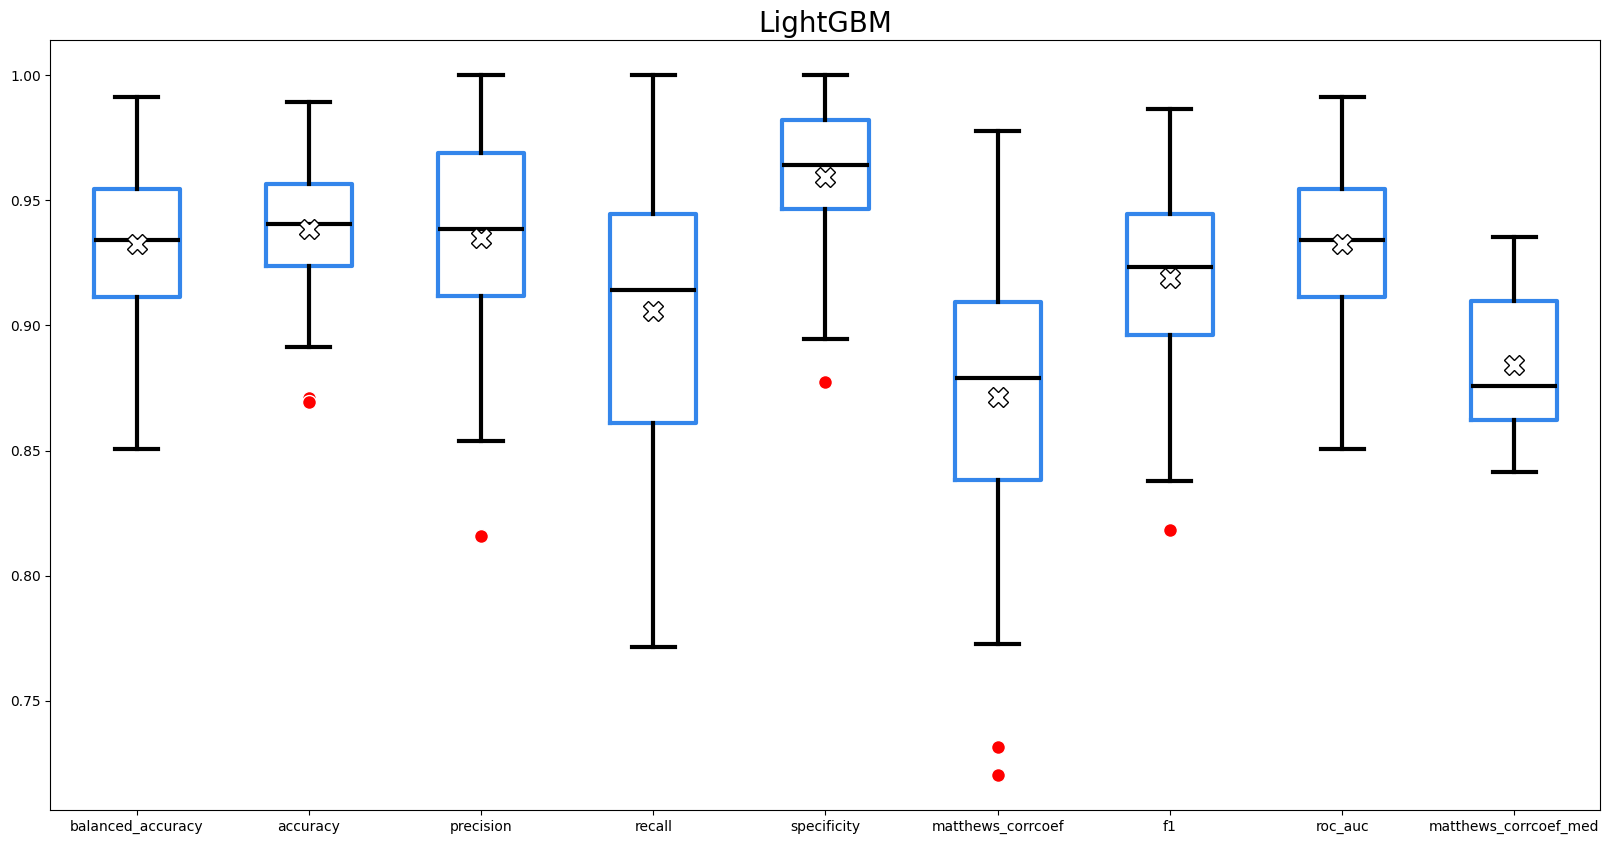

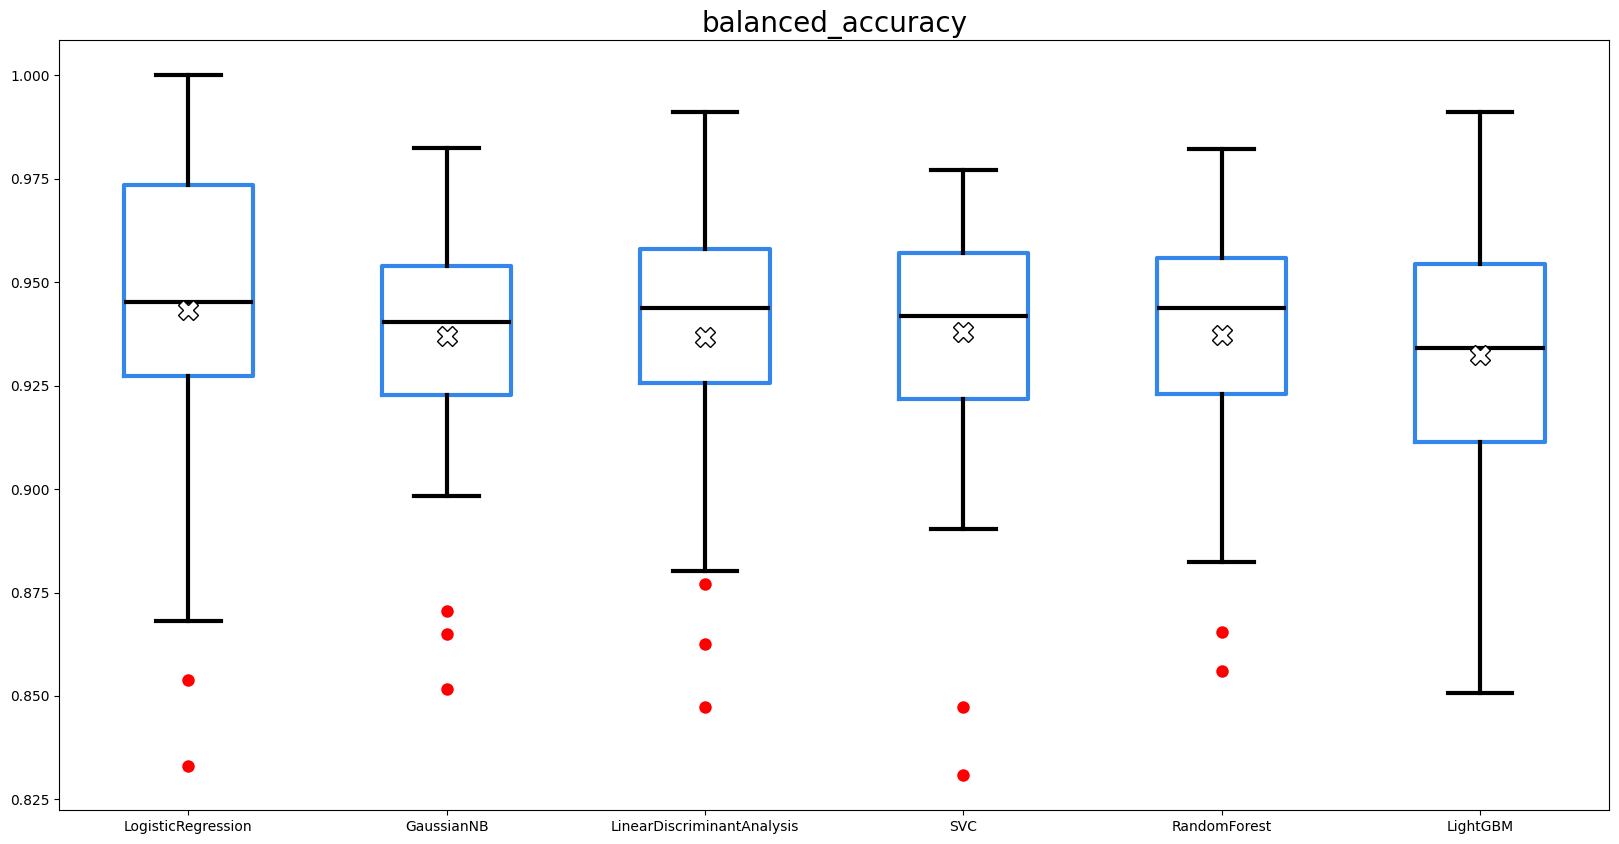

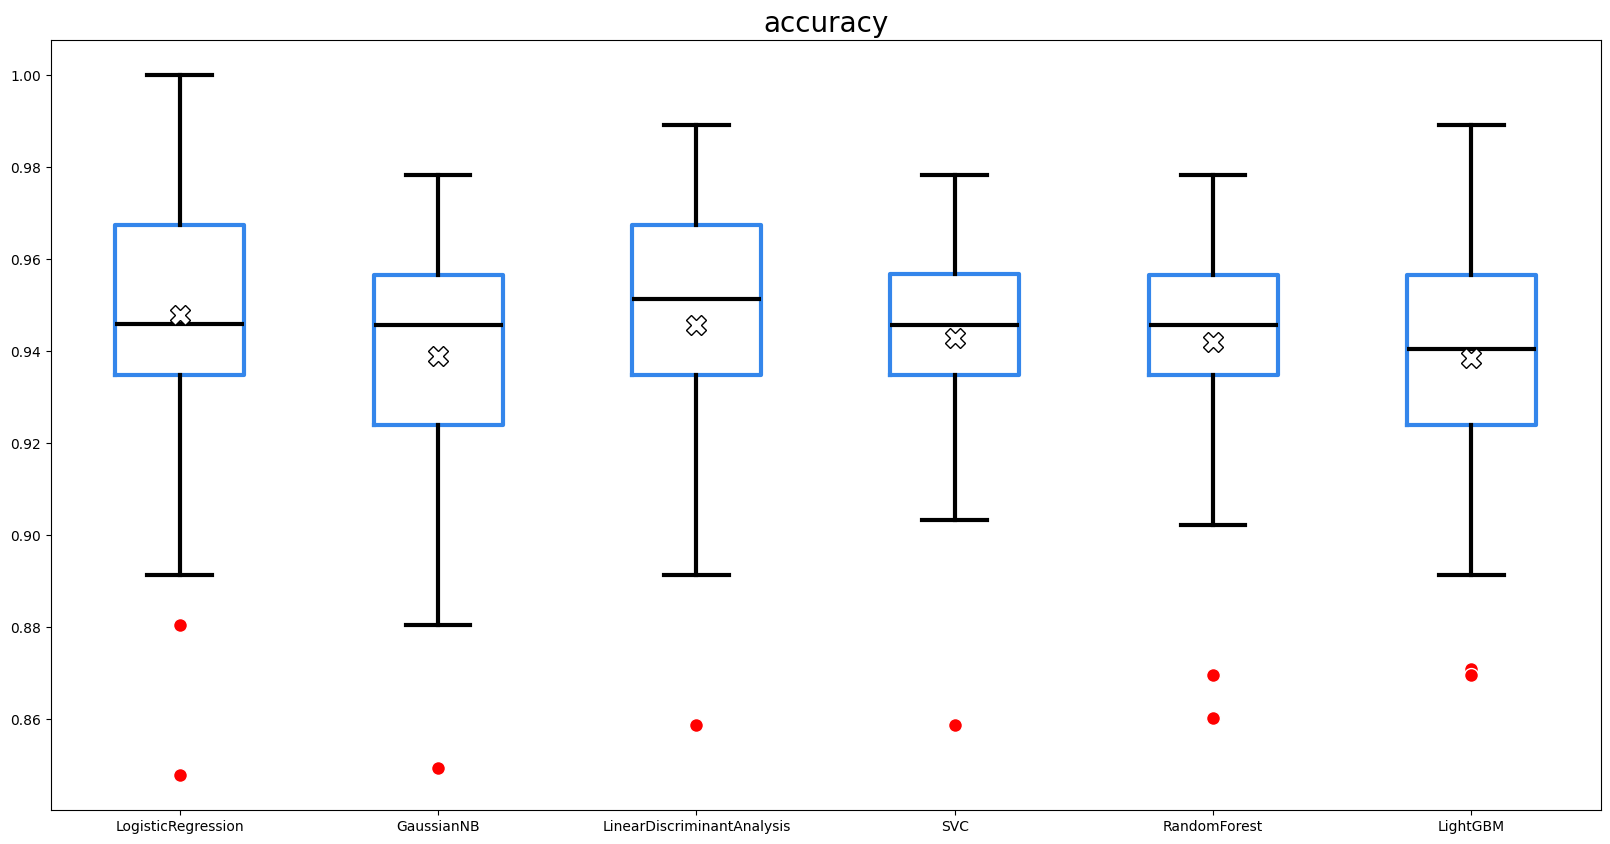

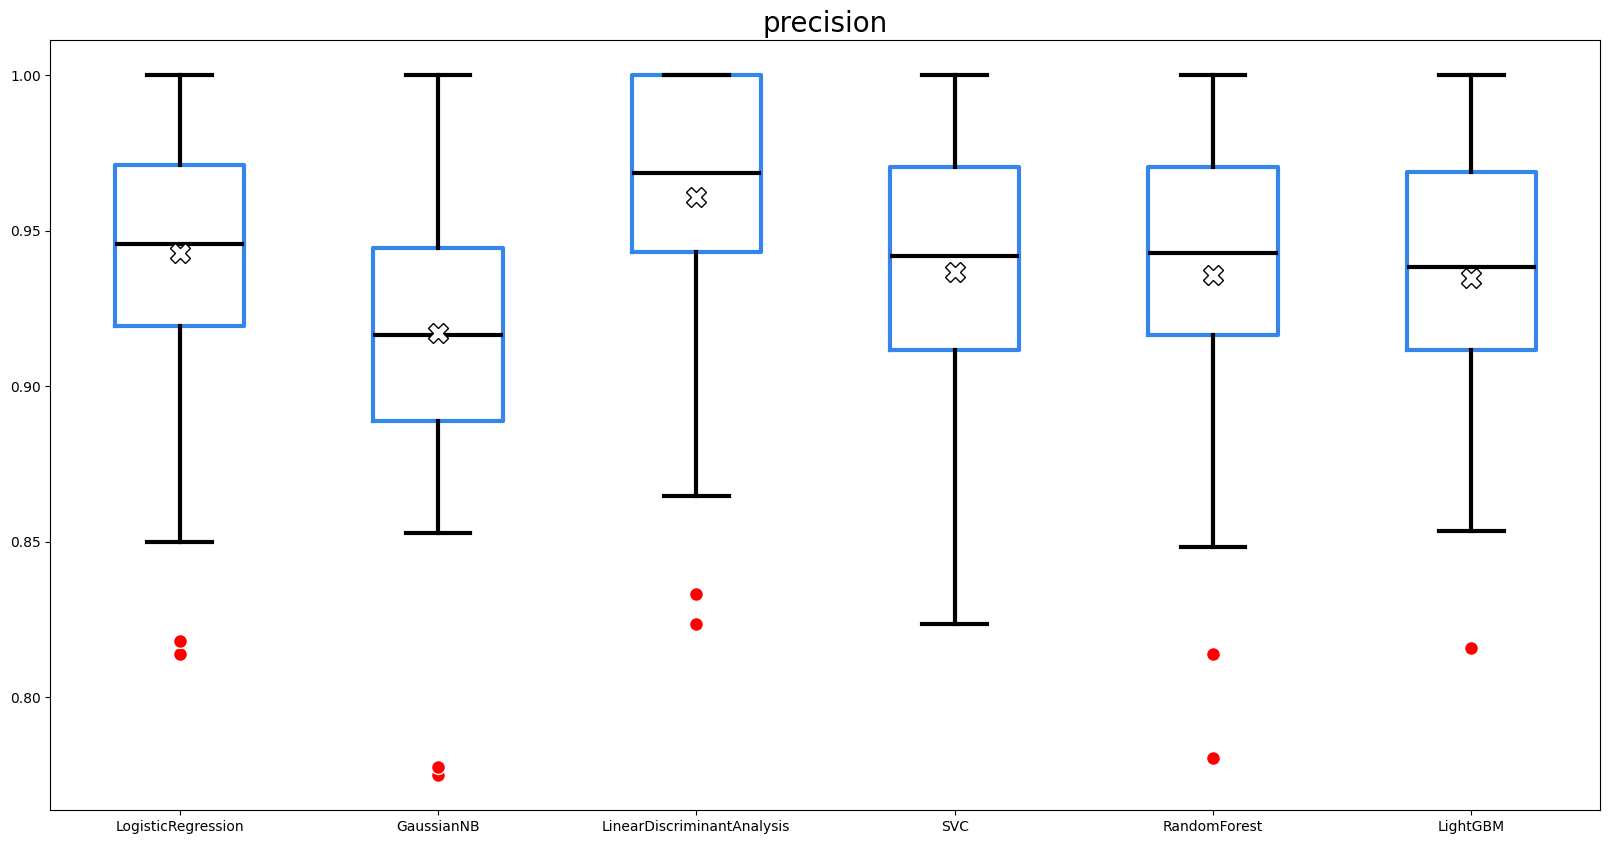

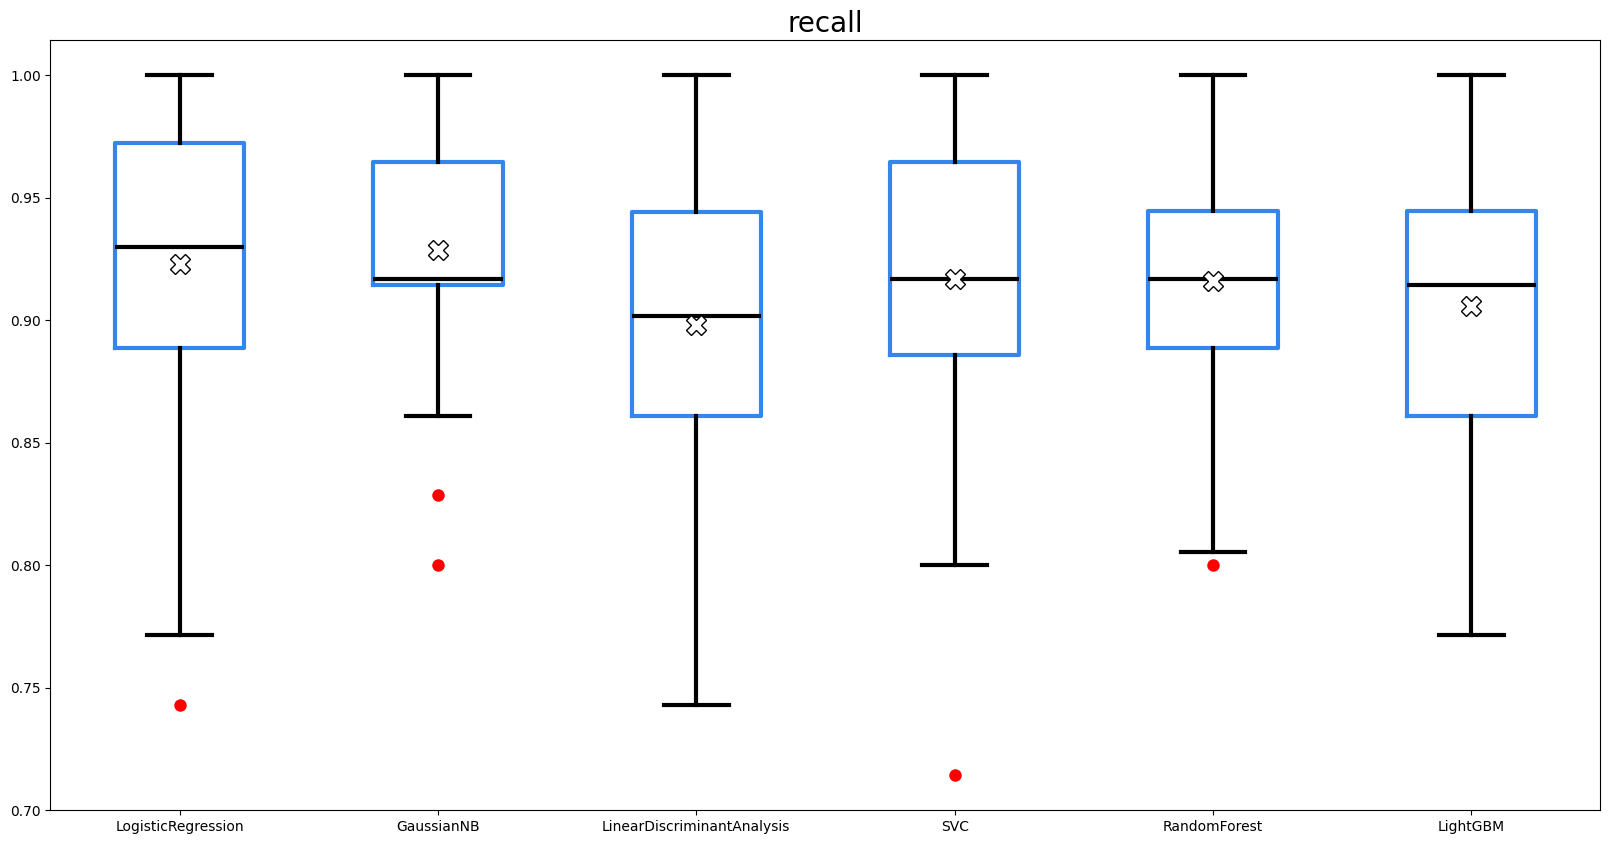

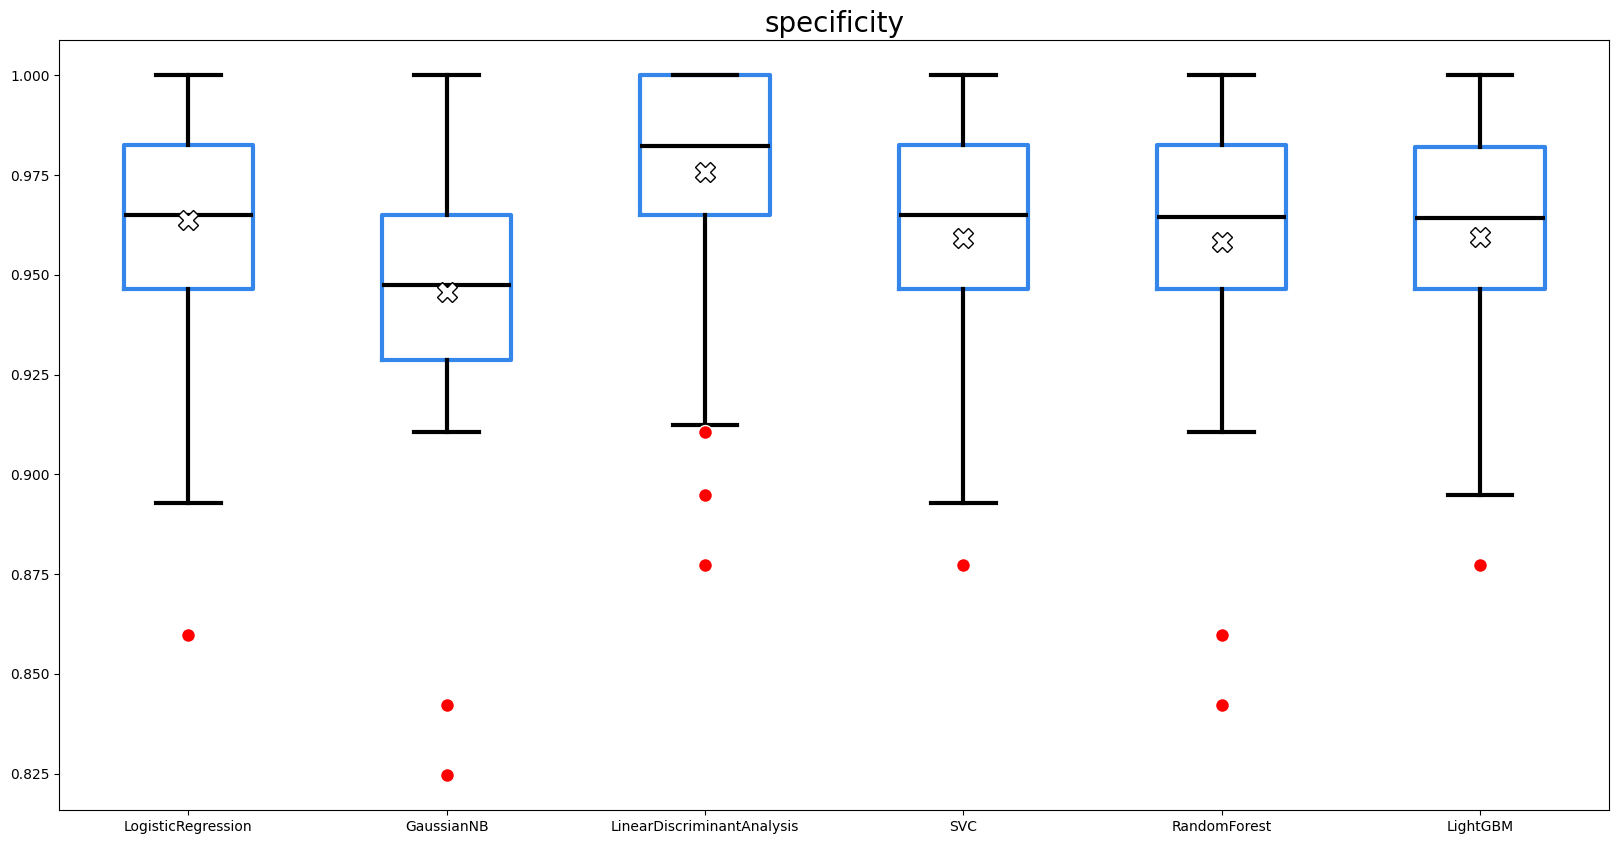

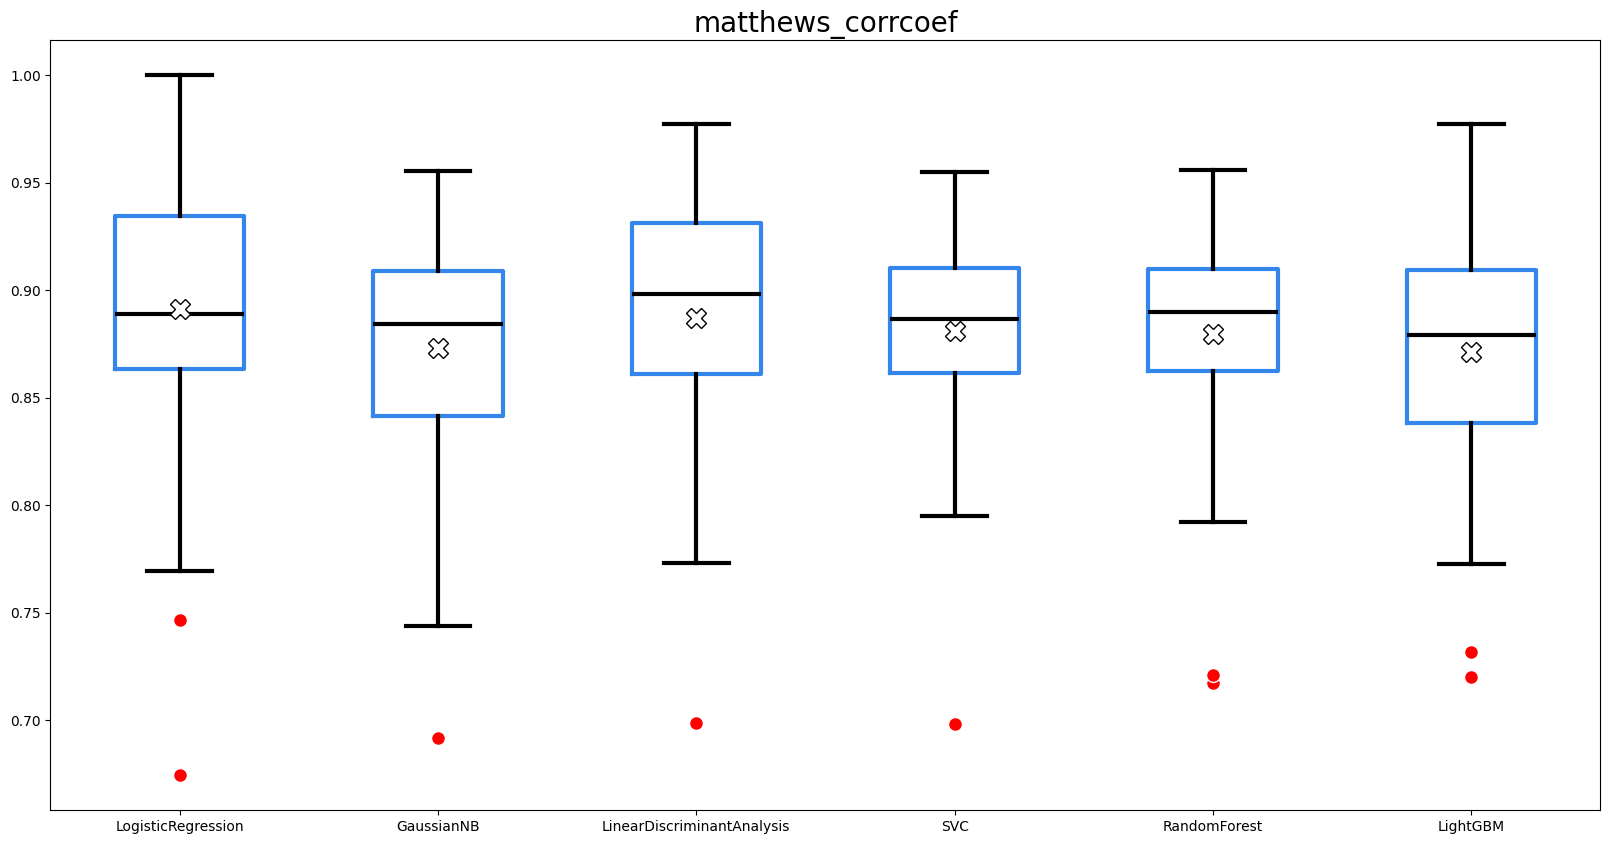

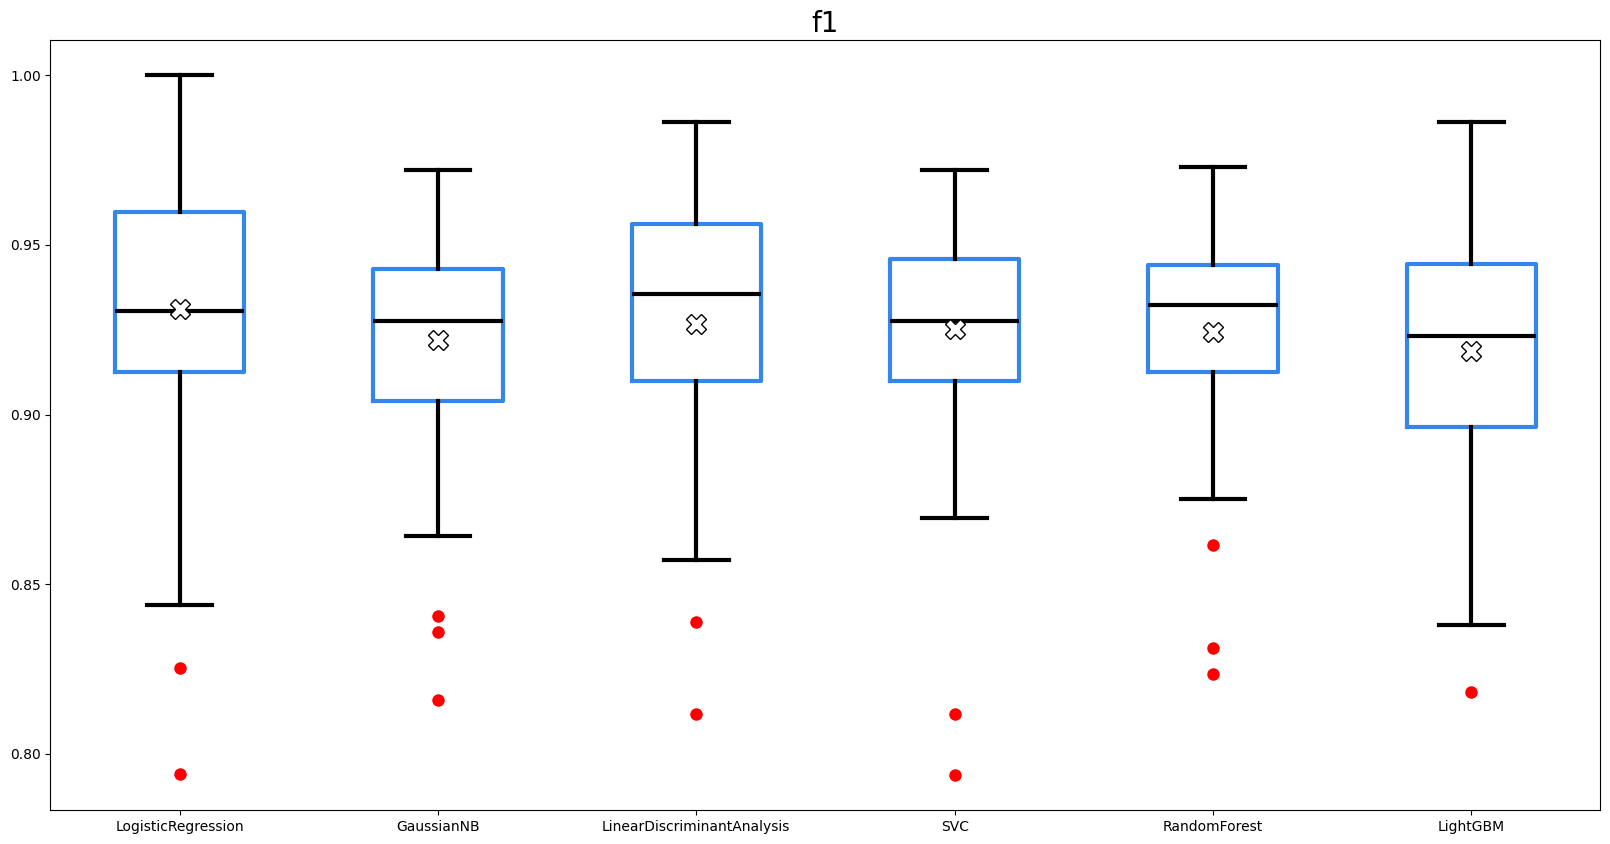

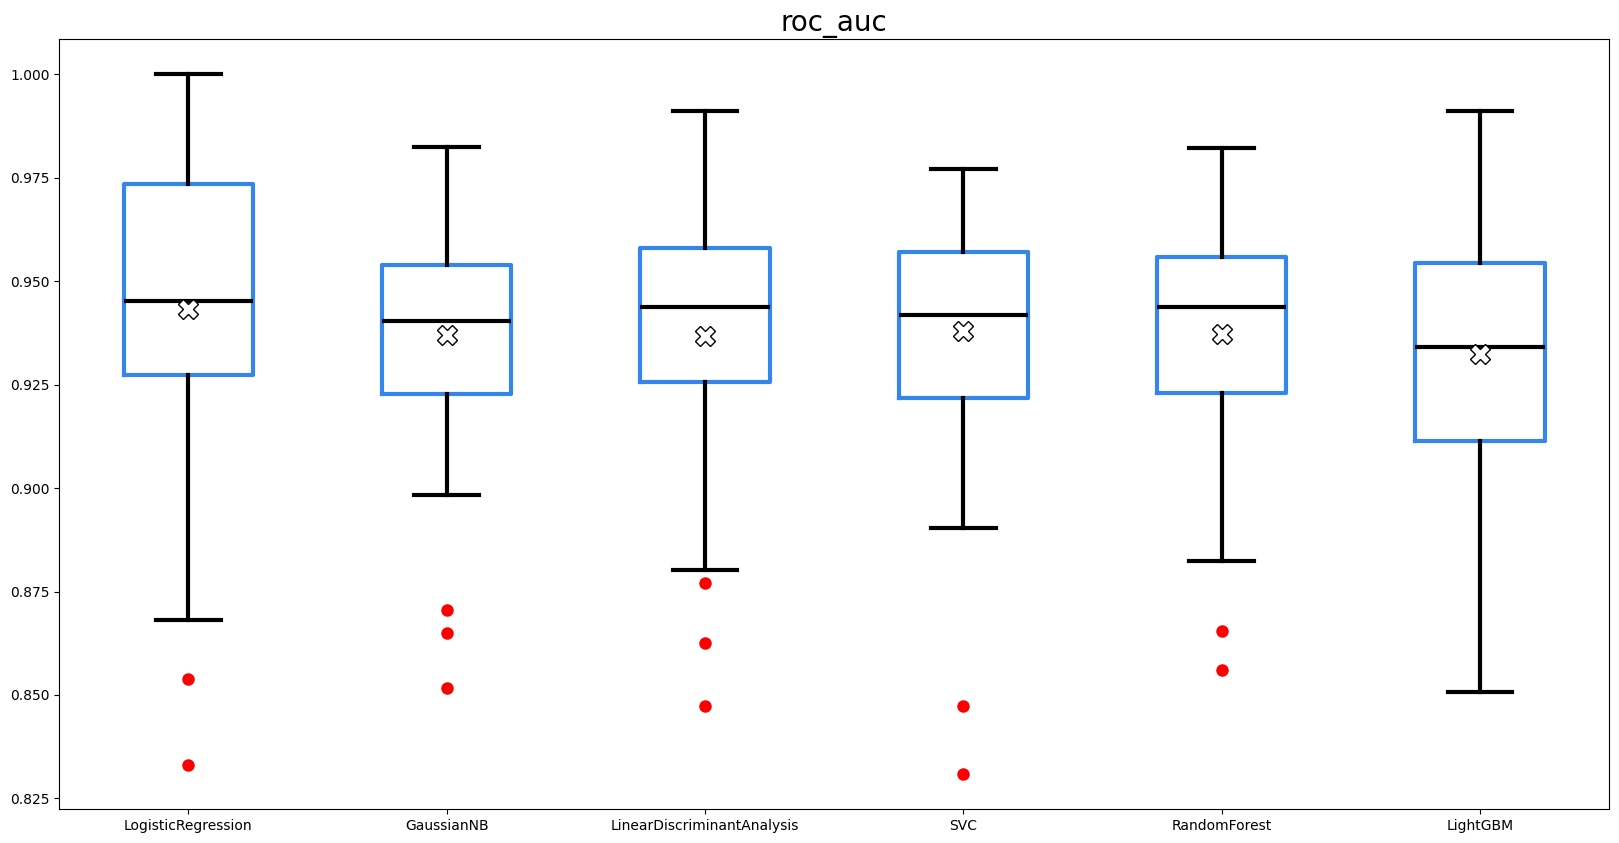

In [6]:
dfLR = pd.read_csv(
    os.path.join(RESULTS_DIR, "LogisticRegression_summary.csv")
)
dfGNB = pd.read_csv(
    os.path.join(RESULTS_DIR, "GaussianNB_summary.csv")
)
dfLDA = pd.read_csv(
    os.path.join(RESULTS_DIR, "LinearDiscriminantAnalysis_summary.csv")
)
dfSVC = pd.read_csv(
    os.path.join(RESULTS_DIR, "SVC_summary.csv")
)
dfRF = pd.read_csv(
    os.path.join(RESULTS_DIR, "RandomForestClassifier_summary.csv")
)
dfLGBM = pd.read_csv(
    os.path.join(RESULTS_DIR, "LGBMClassifier_summary.csv")
)

visualize_training_summary_boxplots(
    names=[
        "LogisticRegression", "GaussianNB", "LinearDiscriminantAnalysis",
        "SVC", "RandomForest", "LightGBM"
    ],
    dfs=[dfLR, dfGNB, dfLDA, dfSVC, dfRF, dfLGBM],
    boxplot_kws={
        "figsize": (20, 10),
        "metrics": [
            "balanced_accuracy", "accuracy", "precision", "recall",
            "specificity", "matthews_corrcoef", "f1", "roc_auc"
        ],
        "showmeans": True,
        "meanprops": {
            "marker": "X", "markerfacecolor": "white",
            "markeredgecolor": "black", "markersize": 15
        },
        "boxprops": {
            "linewidth": 3, "color": "#3486eb"
        },
        "medianprops": {
            "color": "black", "linewidth": 3
        },
        "flierprops": {
            "markerfacecolor": "red", "markeredgecolor": "white",
            "markersize": 10
        },
        "wiswidth": 3
    }
)

In [7]:
tabulate_hyperparameter_spaces(
    [
        "LogisticRegression",
        "GaussianNB",
        "LinearDiscriminantAnalysis",
        "SVC",
        "RandomForestClassifier",
        "LGBMClassifier"
    ],
    [
        os.path.join(MODELS_DIR, "LogisticRegression_params.json"),
        os.path.join(MODELS_DIR, "GaussianNB_params.json"),
        os.path.join(MODELS_DIR, "LinearDiscriminantAnalysis_params.json"),
        os.path.join(MODELS_DIR, "SVC_params.json"),
        os.path.join(MODELS_DIR, "RandomForestClassifier_params.json"),
        os.path.join(MODELS_DIR, "LGBMClassifier_params.json")
    ]
)

                LogisticRegression                
C                        |       43.705147209907224
l1_ratio                 |      0.05358053712246813
max_iter                 |                     1758
class_weight             |                     None



                    GaussianNB                    
var_smoothing            |   1.9408779665252126e-10



            LinearDiscriminantAnalysis            
solver                   |                     lsqr
shrinkage                |                     auto
priors                   |                     None



                       SVC                        
C                        |       0.8968667203356795
gamma                    |                     auto
coef0                    |      0.08215053148083451
kernel                   |                   linear
class_weight             |                     None



              RandomForestClassifier              
n_estimators             |                       32
crite

In [8]:
# Validate the top model's performance against the holdout set
y, y_pred, d = validate(
        data_dir=DATA_DIR,
        file_name="validation_set.csv",
        models_dir=MODELS_DIR,
        model_name="LinearDiscriminantAnalysis",
        target="diagnosis",
        n_bootstraps=1000
    )

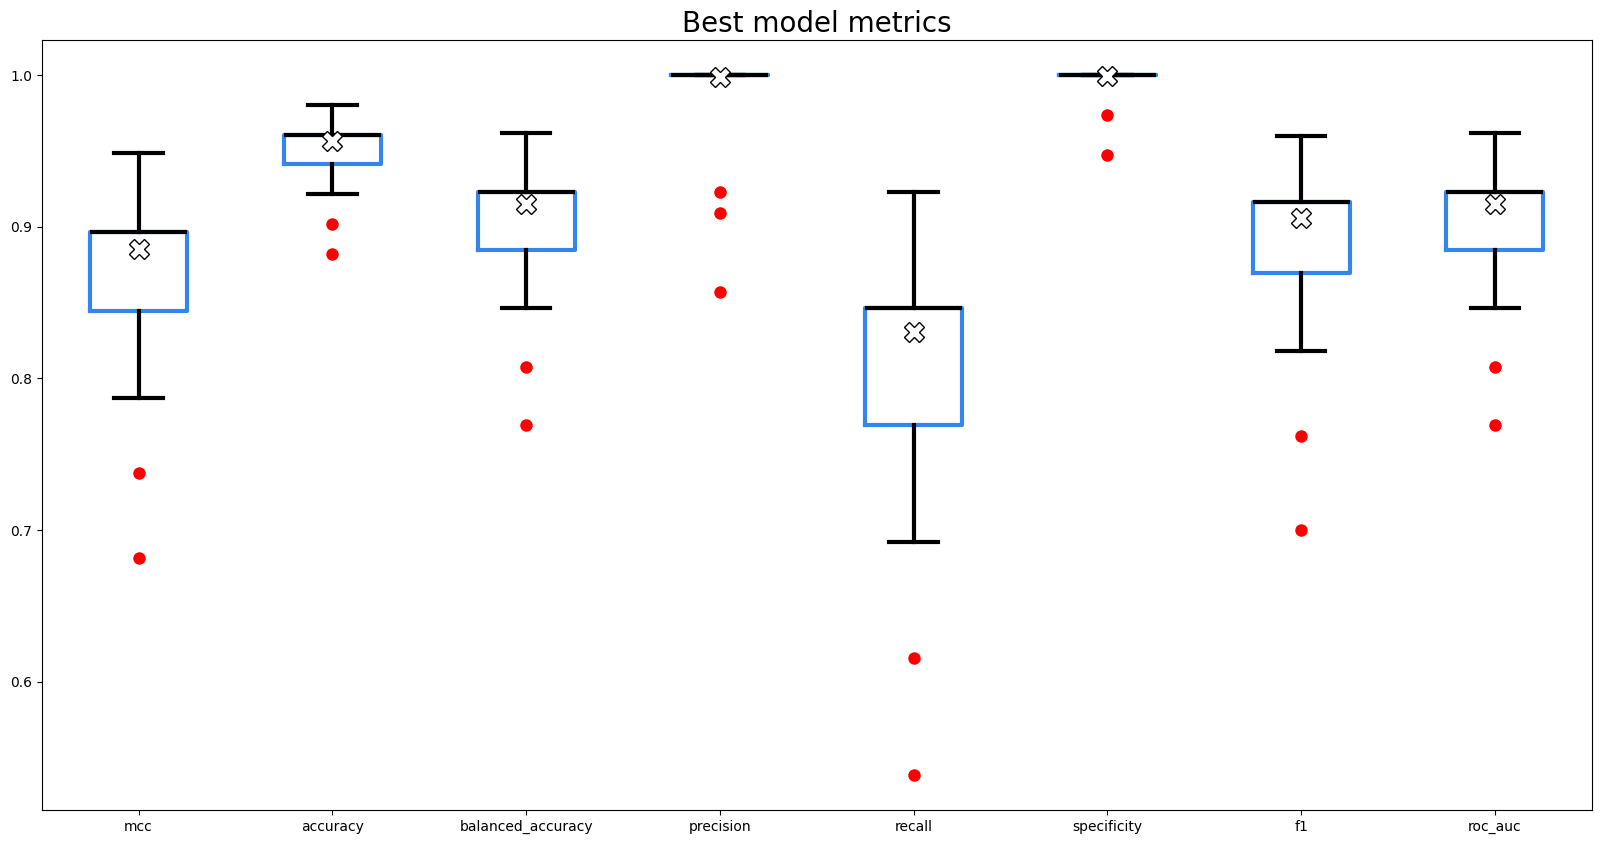

In [9]:
visualize_bootstrap_results(
    d
)